In [1]:
import numpy as np
import pandas as pd
import os
from ast import literal_eval
import matplotlib.pyplot as plt
import skimage as sk
from tqdm import tqdm

In [2]:
PATH = '../../data/landmarks/'

In [3]:
csv_path = PATH
for file in os.listdir(PATH):
    if '.csv' in file:
        csv_path += file
df = pd.read_csv(csv_path)

In [4]:
df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,_ND87877.JPG,9955722,{},7,0,"{""name"":""point"",""cx"":1934,""cy"":1110}",{}
1,_ND87877.JPG,9955722,{},7,1,"{""name"":""point"",""cx"":2144,""cy"":1484}",{}
2,_ND87877.JPG,9955722,{},7,2,"{""name"":""point"",""cx"":2205,""cy"":1633}",{}
3,_ND87877.JPG,9955722,{},7,3,"{""name"":""point"",""cx"":2269,""cy"":1487}",{}
4,_ND87877.JPG,9955722,{},7,4,"{""name"":""point"",""cx"":2473,""cy"":1092}",{}


In [5]:
index = df.index
filenames = df.loc[:,'filename']
region_id = df.loc[:,'region_id']
dictionary = [literal_eval(df.loc[:,'region_shape_attributes'][i]) for i in range(len(index))]

In [10]:
dict_size = {}
for i in tqdm(range(len(filenames))):
    image = sk.io.imread(PATH + 'images/'+ filenames[i])
    dict_size[filenames[i]] = image.shape
print(dict_size)

100%|██████████████████████████████████████████████████████████████████████████████| 4765/4765 [03:04<00:00, 25.77it/s]


{'_ND87877.JPG': (6251, 4167, 3), '_ND87902SM.jpg': (1067, 1600, 3), '00cc68a50b2d016a6b29af628ea4e04b.jpg': (500, 375, 3), '00e9ed3fab1d2032603d1a90e557976f.jpg': (500, 443, 3), '00fa641312604199831755f96109fde7.jpg': (1200, 1600, 3), '0a0c223352985ec154fd604d7ddceabd.jpg': (375, 500, 3), '0a6c192b96e55e2ca37318919b1ffae6.jpg': (422, 500, 3), '0a9f8f6543d0b33fe9474035dd5323ef.jpg': (500, 453, 3), '0a4116a80e753f7b0adf4149f551a3a7.jpg': (375, 500, 3), '0a9832b18d360f50f5b3b2ab4c540ddc.jpg': (375, 500, 3), '0a783538d5f3aaf017b435ddf14cc5c2.jpg': (500, 500, 3), '0aa31d6ecdb95ac7d3b7fa42b86bd91b.jpg': (334, 500, 3), '0ab9cdefc666573f8019356ffefe0c69.jpg': (600, 550, 3), '0ab12906ac3a87b531c574a15e79c58a.jpg': (547, 397, 3), '0b1b49b8cf679eb3e2fb13ca6deba9b5.jpg': (375, 500, 3), '0b1cdb2a36dd432fcc7567959cb23798.jpg': (333, 500, 3), '0b1e71a499a26eaacc06991bca982523.jpg': (239, 360, 3), '0b2d69f59303805f17055bd59615a297.jpg': (333, 500, 3), '0b3d3120a62c2bc280f589d473041d06.jpg': (375, 500

In [30]:
row_sz = np.array([val[0] for val in dict_size.values() if len(val)>1])

In [31]:
col_sz = np.array([val[1] for val in dict_size.values() if len(val)>1])

In [32]:
small_row = [sz for sz in row_sz if sz < 1000]
small_col = [sz for sz in col_sz if sz < 1000]

(array([ 19.,  35., 132.,  34., 263.,   4.,   2.,  19.,   6.,   7.]),
 array([170. , 249.7, 329.4, 409.1, 488.8, 568.5, 648.2, 727.9, 807.6,
        887.3, 967. ]),
 <a list of 10 Patch objects>)

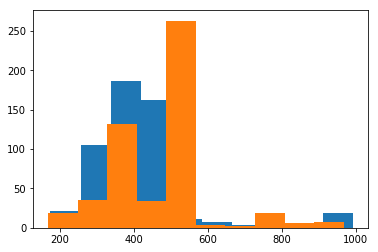

In [34]:
plt.hist(small_row)
plt.hist(small_col)

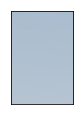

In [13]:
# Decided size: 500x500
plt.figure(figsize=(10,10))
for i in range(1):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = sk.io.imread(PATH + 'images/'+ filenames[i*7])
    x, y, _ = image.shape
    a = 500/x
    b = 500/y
    M = np.array([[a,0,0],[0,b,0],[0,0,1]])
    image_resized = np.empty((500,500,3))
    image_resized = sk.transform.warp(image, M)
    plt.imshow(image_resized, cmap=plt.cm.binary)

[[171. 103.]
 [304. 194.]
 [313. 221.]
 [328. 191.]
 [283.  93.]
 [172.  14.]
 [281. 324.]]


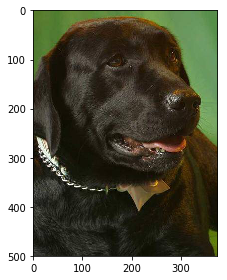

In [50]:
n = 2
image = sk.io.imread(PATH + 'images/'+ filenames[n*7])
landmarks = np.empty((0,2))
for i in range(7):
    landmarks = np.append(landmarks, np.array([[dictionary[n*7 + i]['cx'],dictionary[n*7 + i]['cy']]]), axis = 0)
    #image[int(landmarks[i][1])][int(landmarks[i][0])] = [255,255,255]
print(landmarks)
sk.io.imshow(image)
sk.io.imsave('coucou.jpg', image)

[[228.         103.        ]
 [405.33333333 194.        ]
 [417.33333333 221.        ]
 [437.33333333 191.        ]
 [377.33333333  93.        ]
 [229.33333333  14.        ]
 [374.66666667 324.        ]]


c:\users\guillaume\anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


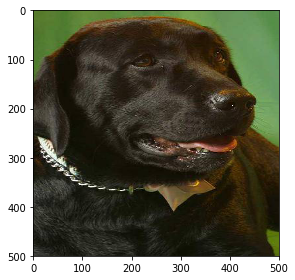

In [56]:
x, y, _ = image.shape

image_resized = sk.transform.resize(image,(500,500,3),mode='reflect',anti_aliasing=False)


a = 500/x
b = 500/y
new_land = np.copy(landmarks)
for i in range(7):
    new_land[i] *= np.array([b,a])
    image_resized[int(new_land[i][1])][int(new_land[i][0])] = [1,1,1]
    
print(new_land)
sk.io.imshow(image_resized)
sk.io.imsave('test.jpg', image_resized)